<a href="https://colab.research.google.com/github/hapuripopo/Youtube-Strategy/blob/main/LastTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터의 기초 정보 살펴보기
### `videos-stats.csv` 데이터셋의 기본 정보

* `Title` : 영상 제목
* `Video ID` : 영상 ID
* `Published At` : 영상 공개 날짜
* `Keyword` : 영상과 연관된 핵심 단어
* `Likes` : 영상 좋아요 수, -1일 경우 좋아요 비공개
* `Comments` : 댓글수, -1일 경우 댓글기능 사용불가
* `Views` : 조회수

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 지수표현 -> 실수표현
pd.options.display.float_format = '{:,.0f}'.format

file_path = '../content/videos-stats.csv'
videos = pd.read_csv(file_path, index_col=0)

print(videos.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 1880
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1881 non-null   object 
 1   Video ID      1881 non-null   object 
 2   Published At  1881 non-null   object 
 3   Keyword       1881 non-null   object 
 4   Likes         1879 non-null   float64
 5   Comments      1879 non-null   float64
 6   Views         1879 non-null   float64
dtypes: float64(3), object(4)
memory usage: 117.6+ KB
None


* Non-Null Count가  index수와 같지 않은 컬럼이 존재 -> NaN 데이터 존재

In [48]:
videos.head()

,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,"3,407",672,"135,612"
1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,"76,779","4,306","1,758,063"
2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,"63,825","3,338","1,564,007"
3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,"71,566","1,426","922,918"
4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,"96,513","5,155","1,855,644"


In [49]:
videos.describe()

,Likes,Comments,Views
count,"1,879","1,879","1,879"
mean,"170,061","7,863","11,612,916"
std,"796,229","37,880","108,444,994"
min,-1,-1,25
25%,"2,672",199,"84,515"
50%,"14,787",814,"591,721"
75%,"60,906","3,378","2,804,978"
max,"16,445,558","732,818","4,034,122,271"


### 데이터 전처리
[NaN 처리하기]

In [50]:
# NaN 셀 확인하기
print('----------NaN----------')
print(videos.isnull().sum(axis=0))

videos.dropna(how='any', inplace=True)

# NaN 처리 확인하기
print()
print('------NaN제거 후------')
print(videos.isnull().sum(axis=0))


----------NaN----------
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           2
Comments        2
Views           2
dtype: int64

------NaN제거 후------
Title           0
Video ID        0
Published At    0
Keyword         0
Likes           0
Comments        0
Views           0
dtype: int64


[중복 데이터 처리하기]
* `[Video ID]`가 동일 할 경우, 같은 영상이므로 제거 합니다.

In [51]:
# 중복 데이터 개수 확인
print('중복 데이터 개수: ', videos['Video ID'].duplicated().sum())

# 중복 데이터 제거
videos.drop_duplicates(subset=['Video ID'], inplace=True)

# 중복 데이터 처리 확인하기
print('제거 후 중복 데이터 개수:', videos['Video ID'].duplicated().sum())


중복 데이터 개수:  12
제거 후 중복 데이커 개수: 0


[특수 값을 가지는 데이터 처리하기]
* `[Likes]`는 비공개일 경우 -1 값을 가지며, 좋아요 수를 알 수 없습니다.
* `[Comments]`는 사용불가일 경우 -1 값을 가지며, 댓글의 영향력을 예측할 수 없습니다.
* 따라서 두 조건 중 하나라도 해당될 때 데이터 전처리가 필요합니다.

In [55]:
# 두 조건 중 하나라도 만족하는 데이터 찾기
mask = (videos['Likes'] < 0)|(videos['Comments']<0)
print('만족하는 데이터 개수: ', videos.loc[mask,:].shape[0])
print(videos.loc[mask, :])


만족하는 데이터 개수:  8
                                                  Title     Video ID  \
243   How To Build A Business That Works | Brian Tra...  MN7yfV4UuCI   
266   ตลาดถุงมือยางทรุด! ฉุดราคาร่วงลงทุนหด | BUSINE...  cG37cEi1nPc   
583                         DON&#39;T GOOGLE THIS STUFF  NAV2laKrDv4   
1016  15 Kilo Zayıf Gösteren Kız Makyajı |Arkadaşlar...  -NcdEl405KY   
1677  FULL Marvel Studios Panel from Hall H | San Di...  rf-NqJQJHBU   
1701  SURVIVOR 🦀🦂 Best Action Movies 2022 🦀🦂 Latest ...  __7MkaWFObQ   
1709  BEST Auditions Of Songs From Movies | Amazing ...  ZcBBGC8_mfU   
1710  The Magnificent Seven - Full Movie In English ...  1MZY_0tYmrs   

     Published At   Keyword  Likes  Comments     Views  
243    2021-02-09  business     -1     1,144   676,300  
266    2022-08-23  business     -1        13    12,332  
583    2017-08-28    google     -1    18,676 6,515,548  
1016   2022-08-23   mukbang     -1       335    27,451  
1677   2022-07-24    marvel     -1       821   553

* 두 조건의 데이터의 개수가 많지 않아서 **삭제** 하기로 결정했습니다.

In [57]:
videos.drop(videos.loc[mask,:].index, axis=0, inplace=True)
print('제거 후 만족하는 데이터 개수: ', videos.loc[mask,:].shape[0])

제거 후 만족하는 데이터 개수:  0


[데이터 전처리 확인]

In [58]:
# 인덱스 초기화
videos.reset_index(inplace=True)

# 전처리 후 데이터셋 정보 확인
print(videos.info())
print()
videos.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1859 entries, 0 to 1858
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1859 non-null   int64  
 1   Title         1859 non-null   object 
 2   Video ID      1859 non-null   object 
 3   Published At  1859 non-null   object 
 4   Keyword       1859 non-null   object 
 5   Likes         1859 non-null   float64
 6   Comments      1859 non-null   float64
 7   Views         1859 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 116.3+ KB
None



,index,Likes,Comments,Views
count,"1,859","1,859","1,859","1,859"
mean,937,"169,846","7,849","11,695,674"
std,542,"797,639","37,997","109,021,050"
min,0,0,0,25
25%,468,"2,710",202,"85,244"
50%,936,"14,899",820,"589,907"
75%,"1,406","61,011","3,395","2,804,978"
max,"1,878","16,445,558","732,818","4,034,122,271"


# 데이터 탐색과 시각화
### 피처간의 상관관계 탐색

[`float` 자료형 피처들의 상관관계 분석]

* VIews(조회수)와 다른 피처의 상관은 이미 명백하므로, 0.9가 넘는 것만 상관이 있다고 가정했습니다.
* 조회수에 **기여한 순위가 높은 요소** 분석이 목적이므로 `spearman` 상관계수를 사용했습니다.

In [285]:
cols = ['Likes', 'Comments', 'Views']
corr = videos[cols].corr(method='pearson')
print(corr)


          Likes  Comments  Views
Likes         1         1      1
Comments      1         1      1
Views         1         1      1


[`float`자료형 피처들의 상관관계 시각화]

In [ ]:
# 라이브러리 설치
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


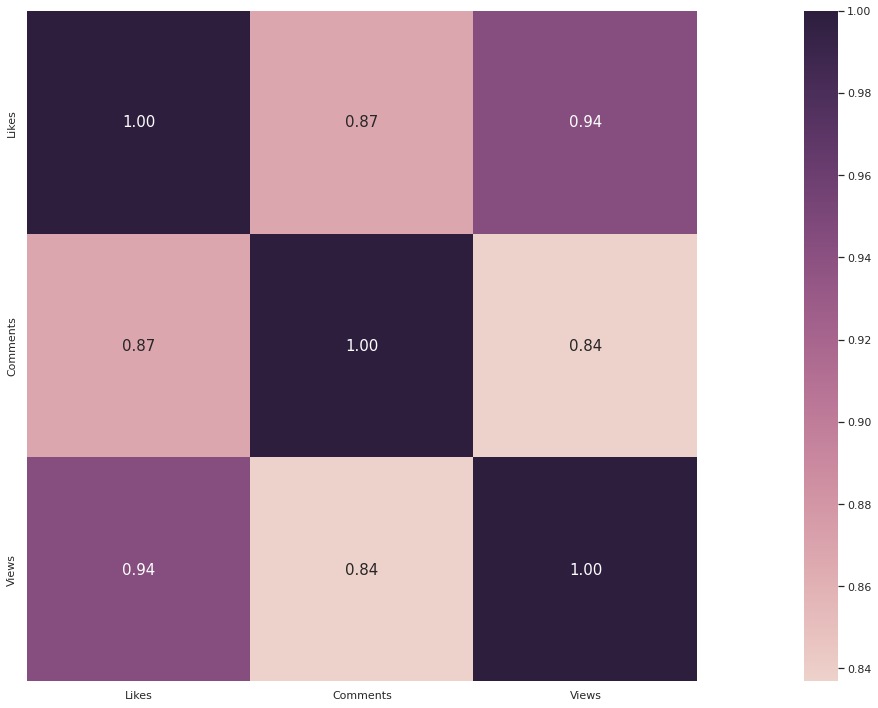

In [ ]:
import seaborn as sns

# corr 행렬 히트맵 시각화합니다.
sns.set(font_scale=1)
hm = sns.heatmap(corr.values,
                 cbar=True,
                 annot=True,
                 square=True,
                 cmap=sns.cubehelix_palette(as_cmap=True),
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()


* 조회수(`Views`)는 댓글보다 **좋아요(`Likes`)**와 더 연관되어 있음을 알 수 있습니다.
* 댓글(`Comments`)는 조회수보다 **좋아요(`Likes`)**와 더 연관되어 있음을 알 수 있습니다.
* 결론 : 인기있고, 사람들에게 자주 노출되는 영상은 댓글보다 좋아요와 연관 되어있습니다.

### 키워드별 상관관계 탐색
[`Keyword`피처 분석]
* 41개의 키워드로 분류한 데이터셋임을 확인했습니다.

In [ ]:
print(videos['Keyword'].unique().shape)
print()
print(videos['Keyword'].value_counts())


(41,)

machine learning    50
reaction            50
asmr                50
trolling            50
mrbeast             50
cnn                 50
history             50
interview           50
physics             50
minecraft           50
cubes               50
crypto              50
tutorial            50
marvel              50
data science        50
game development    50
xbox                49
sports              49
sat                 49
computer science    48
nintendo            48
tech                48
food                48
how-to              48
business            48
chess               47
biology             47
music               46
literature          46
google              45
movies              45
mukbang             45
bed                 44
gaming              43
apple               42
lofi                41
news                39
finance             39
animals             38
education           24
mathchemistry       15
Name: Keyword, dtype: int64


[`keyword`별 그룹화]
* 키워드별로 그룹화한 뒤, 피처의 평균 수치를 출력했습니다.

In [ ]:
# 지수표현 -> 실수표현으로 보기
pd.options.display.float_format = '{:.0f}'.format

videos_keyword = videos.groupby(['Keyword'])

# 평균 피처 값
cols_view = ['Likes', 'Comments', 'Views']
print(videos_keyword[cols_view].mean())


                   Likes  Comments     Views
Keyword                                     
animals           760776     21872  94723961
apple             118079      8619  10746930
asmr               36615      1227   1706616
bed               473682     15181  53893229
biology            66484      4292   4121606
business           71985      1840   7236355
chess              36042      1472   1323294
cnn                 8836      7575    554240
computer science   33664      1171   1191959
crypto              8521       547    404608
cubes             303061      6833  15038739
data science       17176       518    544772
education          62292      4113   2684433
finance            13235      1084    694223
food               95015      5523   5252406
game development   26179      1376    724689
gaming             24897      1377    519645
google            471167     22646 103364971
history           273411     20190  15047130
how-to            158898      6951   7809285
interview 

[평균 조회수가 높은 키워드 TOP 10]
* 조회수별로 정렬하기(내림차순)
* TOP 10 출력


In [ ]:
sorted_mean = videos_keyword['Views'].mean().sort_values(ascending=False)
sorted_mean.head(10)

Keyword
google    103364971
animals    94723961
mrbeast    66764004
bed        53893229
music      29364893
history    15047130
cubes      15038739
mukbang    10904772
apple      10746930
sports      8601205
Name: Views, dtype: float64

[최고 조회수가 높은 키워드 TOP 10]
* 최고 조회수별로 정렬하기(내림차순)
* TOP 10 출력

In [ ]:
sorted_max = videos_keyword['Views'].max().sort_values(ascending=False)
sorted_max.head(10)

Keyword
google     4034122271
animals    1582262997
music       915457091
bed         524709805
history     434352213
apple       425478119
mrbeast     285526909
business    208293677
cubes       168546247
sports      106014469
Name: Views, dtype: float64

[평균 조회수 TOP 5 키워드의 조회수 분포]

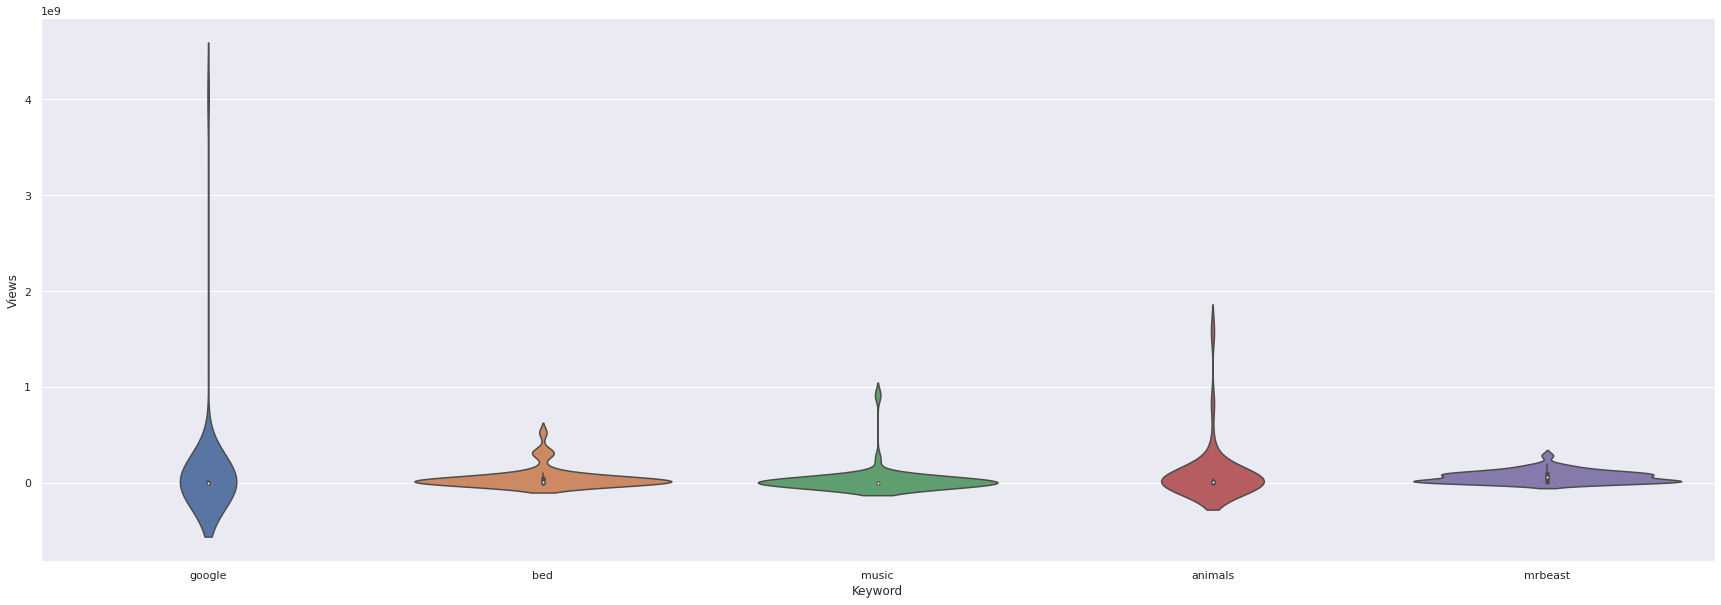

In [ ]:
mask = (videos.Keyword == 'google')|(videos.Keyword == 'animals')|(videos.Keyword == 'mrbeast')|(videos.Keyword == 'bed')|(videos.Keyword == 'music')

sns.violinplot(data=videos.loc[mask], x='Keyword', y='Views')
sns.set(rc = {'figure.figsize':(30,10)})


# 인기 키워드 흐름 분석

> *해당 프로젝트의 최대 목적이자 목표*


### 시간별 인기 키워드
[시계열 데이터로 변환 및 전처리]
* 날짜 포멧으로 저장된 [`Published At`] 컬럼의 데이터 타입을 `object`에서 `datetime`으로 변환
* [`Published At`]를 index로 설정
* 월별 데이터로 데이터를 분석하기 위해 새 컬럼 추가

In [ ]:
# to_datetime으로 Published At 피처를 시계열 피처로 변환합니다.
videos['Published At'] = pd.to_datetime(videos['Published At'])

# Published At이 index인 DataFrame을 만듭니다.
videos_time = videos[:]
videos_time.index = videos_time['Published At']
videos_time.set_index('Published At', inplace=True)

# 일별 데이터 월별 데이터로 구분하기
videos_time['Month'] = videos_time.index.to_period('M')
videos_time['Month'] = videos_time['Month'].astype('object')

videos_time.head()


,Title,Video ID,Keyword,Likes,Comments,Views,Month
Published At,,,,,,,
2022-08-23,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,tech,3407,672,135612,2022-08
2022-08-24,The most EXPENSIVE thing I own.,b3x28s61q3c,tech,76779,4306,1758063,2022-08
2022-08-23,My New House Gaming Setup is SICK!,4mgePWWCAmA,tech,63825,3338,1564007,2022-08
2022-08-23,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,tech,71566,1426,922918,2022-08
2022-08-08,Best Back to School Tech 2022!,ErMwWXQxHp0,tech,96513,5155,1855644,2022-08


[키워드별 조회수 흐름]


> 여기서부터 추가 예정입니다 :)



In [ ]:
import plotly.express as px

month_keyword = videos_time.groupby(['Keyword', 'Month'])
print(month_keyword['Views'].mean())

# fig = px.bar(month_keyword, x='Month', y='Views', animation_frame='Keyword')
# fig.update_layout(width=900,height=650)
# fig.show()
# fig.write_html('/content/keyword_views.html')

Keyword  Month  
animals  2009-07    153478497
         2010-03     38478475
         2010-05      9253680
         2013-06   1582262997
         2014-08    193685278
                      ...    
xbox     2022-03       179180
         2022-04       607849
         2022-06      2827948
         2022-07      1393296
         2022-08        48354
Name: Views, Length: 758, dtype: float64


[평균 조회수 최고 키워드 흐름]
* 키워드별 그룹화

In [ ]:
videos_keyword = videos.groupby(['Keyword'])
# 키워드 값들을 모아 둔 배열
kewords = videos['Keyword'].unique()

kewords
print(kewords)

['tech' 'news' 'gaming' 'sports' 'how-to' 'business' 'tutorial' 'finance'
 'crypto' 'cubes' 'chess' 'apple' 'google' 'interview' 'history'
 'literature' 'bed' 'trolling' 'asmr' 'music' 'food' 'mukbang' 'reaction'
 'lofi' 'animals' 'education' 'minecraft' 'sat' 'mrbeast' 'cnn'
 'mathchemistry' 'biology' 'physics' 'computer science' 'nintendo' 'xbox'
 'marvel' 'movies' 'data science' 'game development' 'machine learning']
